In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

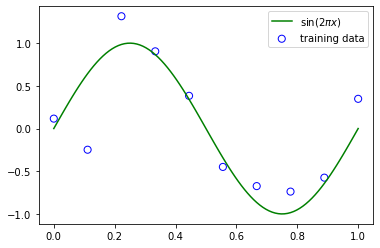

In [7]:
def create_toy_data(func, sample_size, std, rand = False):
    if rand:
        x = np.random.random((1, sample_size))[0]
    else:
        x = np.linspace(0, 1, sample_size).T
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

#### 1. Sample thêm 10 điểm dữ liệu cho tập valdiation

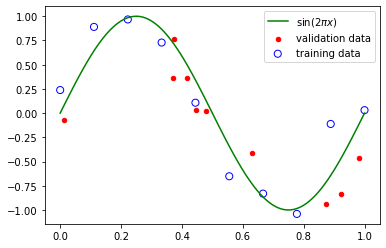

In [11]:
x_train, y_train = create_toy_data(func, 10, 0.25)
x_val, y_val = create_toy_data(func, 10, 0.25, True)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.show()

#### 2. Fit 3 model đa thức (bậc 1, bậc 3, bậc 9) cho dữ liệu trên, đánh giá mức độ underfitting, overfitting của 3 model và tính loss train/val.

In [13]:
class LinearRegression:
    def train(self, X, y):
        self.X = np.c_[X, np.ones(X.shape[0])]
        inv_mat = np.linalg.inv(np.dot(self.X.T, self.X))
        self.coef = np.dot(np.dot(inv_mat, self.X.T), y)
    def fit(self, X=None):
        if X is not None:
            return np.dot(np.c_[X, np.ones(X.shape[0])], self.coef)
        return np.dot(self.X, self.coef)
    def mse(self, fitted, y):
        return np.power(fitted-y,2).sum()/y.shape[0]

def poly(X, deg):
    if deg == 1:
        return X
    if len(X.shape) == 1:
        return poly(np.column_stack((X, np.power(X, deg))), deg-1)
    return poly(np.column_stack((X, np.power(X[:,0], deg))), deg-1)

###### Bậc 1

Train loss: 0.2728900894174594
Val loss: 0.13810315170509305


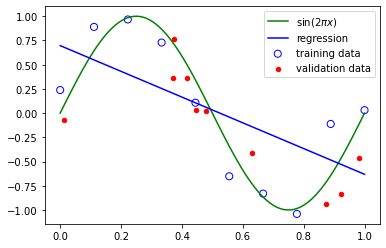

In [14]:
x = LinearRegression()
x.train(x_train, y_train)
fitted = x.fit(x_test)

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(x_val), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

#### => Underfitted

##### Bậc 3

Train loss: 0.041830057136154744
Val loss: 0.0989535145171855


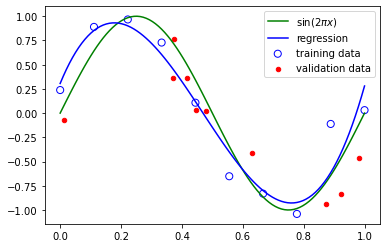

In [15]:
x = LinearRegression()
x.train(poly(x_train, 3), y_train)
fitted = x.fit(poly(x_test, 3))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(poly(x_val, 3)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

#### => Fitted

##### Bậc 9

Train loss: 5.650283612159823e-10
Val loss: 0.5976703637092344


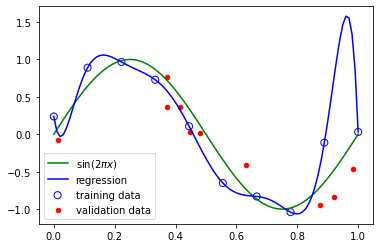

In [16]:
x = LinearRegression()
x.train(poly(x_train, 9), y_train)
fitted = x.fit(poly(x_test, 9))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(poly(x_val, 9)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

#### => Overfitted

#### 3. Thêm 100 dữ liệu vào tập train, model bậc 9 có còn overfitting.

Train loss: 0.04959503807468851
Val loss: 0.08318645888119504


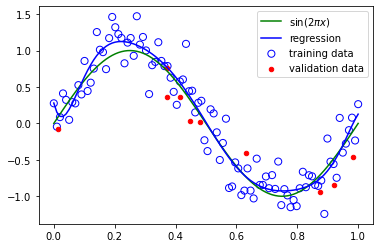

In [17]:
x_train, y_train = create_toy_data(func, 100, 0.25)

x = LinearRegression()
x.train(poly(x_train, 9), y_train)
fitted = x.fit(poly(x_test, 9))

print('Train loss:', x.mse(x.fit(), y_train))
print('Val loss:', x.mse(x.fit(poly(x_val, 9)), y_val))

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.scatter(x_val, y_val, facecolor="r", edgecolor="r", s=20, label="validation data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, fitted, c='b', label ="regression")
plt.legend()
plt.show()

#### 4. Chỉ dùng 10 dữ liệu cho tập train, fil model bậc 9 và dùng rigde regression để giảm overfitting

In [19]:
class RidgeRegression:
    def __init__(self, alpha):
        self.alpha = alpha
    def train(self, X, y):
        self.X = np.c_[X, np.ones(X.shape[0])]
        inv_mat = np.linalg.inv(np.dot(self.X.T, self.X) + self.alpha*np.identity(X.shape[0]))
        self.coef = np.dot(np.dot(inv_mat, self.X.T), y)
    def fit(self, X=None):
        if X is not None:
            return np.dot(np.c_[X, np.ones(X.shape[0])], self.coef)
        return np.dot(self.X, self.coef)
    def mse(self, fitted, y):
        return np.power(fitted-y,2).sum()/y.shape[0]